In [4]:
import random
import statistics
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # importing colormap
plt.style.use('fivethirtyeight')

In [48]:
m,n=10,30
HOT,COLD,AMBIENT=50,0,25
diffusionRate=0.1
hotsites=[(2,0),(3,0),(4,0),(5,0),(6,0),(0,20),(0,21),(0,22)]
coldsites=[(m-1,6),(m-1,7),(m-1,8),(m-1,9),(m-1,10),(m-1,11),(m-1,12)]
    

In [6]:
def applyHotCold(ambientBar,hotsites,coldsites):
    for pt in hotsites:
        ambientBar[pt[0]][pt[1]]=HOT
    for pt in coldsites:
        ambientBar[pt[0]][pt[1]]=COLD
    return ambientBar

In [7]:
def initBar(m,n,hotsites,coldsites):
    ambientBar=np.full((m,n),AMBIENT) # mxn mtrx where each value is filled with 
    return applyHotCold(ambientBar,hotsites,coldsites)

In [8]:
bar=initBar(m,n,hotsites,coldsites)
bar

array([[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 50, 50, 50, 25, 25, 25, 25, 25, 25, 25],
       [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [25, 25, 25, 25, 25, 25, 25, 25, 2

In [9]:
def diffusion(diffusionRate,site,N,NE,E,SE,S,SW,W,NW,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1):  ##apply diffusion
    if(weighted==0):
        return site*(1-8*diffusionRate)+diffusionRate*(N+NE+E+SE+S+SW+W+NW)
    else:
        return site*own_weight+(N+E+S+W)*strgt_wgt+(NE+SE+NW+SW)*crnr_wgt

In [10]:
def reflectingLat(lat):
    row1=lat[0,:]
    row2=lat[m-1,:]
    latNS=np.insert(lat,0,row1,axis=0)
    latNS=np.insert(latNS,m+1,row2,axis=0)
    
    col1=latNS[:,0]
    col2=latNS[:,n-1]
    extendLat=np.insert(latNS,0,col1,axis=1)
    extendLat=np.insert(extendLat,n+1,col2,axis=1)
    return extendLat

In [11]:
extendBar=reflectingLat(bar)

In [12]:
print(extendBar.shape)
print(extendBar)

(12, 32)
[[25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 50 50 50
  25 25 25 25 25 25 25 25]
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 50 50 50
  25 25 25 25 25 25 25 25]
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25 25 25]
 [50 50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25 25 25]
 [50 50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25 25 25]
 [50 50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25 25 25]
 [50 50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25 25 25]
 [50 50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25 25 25]
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25 25 25]
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 

In [13]:
print(bar.shape)
print(bar)

(10, 30)
[[25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 50 50 50 25
  25 25 25 25 25 25]
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [50 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]
 [25 25 25 25 25 25  0  0  0  0  0  0  0 25 25 25 25 25 25 25 25 25 25 25
  25 25 25 25 25 25]]


In [101]:
print(lat[0,:].shape)
col1=lat[:,0].shape
lat=np.insert(lat,0,col1,axis=1)
lat

(3,)


array([[2, 2, 5, 5],
       [2, 2, 5, 5]])

In [14]:
def applyDiffusionExtended(newBar,extendBar,diffusionRate,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1):
    for r in range(1,m+1): # rows going from 1 to m
        for c in range(1,n+1):
            newBar[r-1][c-1]=diffusion(diffusionRate,extendBar[r][c],extendBar[r-1][c-1],extendBar[r-1][c],extendBar[r-1][c+1],extendBar[r][c-1],extendBar[r][c+1],extendBar[r+1][c-1],extendBar[r+1][c],extendBar[r+1][c+1],weighted,own_weight,strgt_wgt,crnr_wgt)
    return newBar     

In [15]:
newBar=np.zeros((m,n))
newBar=applyDiffusionExtended(newBar,extendBar,diffusionRate)
print(newBar.shape)
newBar

(10, 30)


array([[25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 30. , 37.5, 42.5,
        37.5, 30. , 25. , 25. , 25. , 25. , 25. , 25. ],
       [30. , 27.5, 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 27.5, 30. , 32.5,
        30. , 27.5, 25. , 25. , 25. , 25. , 25. , 25. ],
       [37.5, 30. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ],
       [42.5, 32.5, 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ],
       [42.5, 32.5, 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. , 25. ,
        25. , 25. , 25. , 25. , 

In [74]:
def diffusionSim(m,n,diffusionRate,t,typeOfBndryCond,constVal=25,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1,time_lim_for_hot_cold=float('inf')):
    bar=initBar(m,n,hotsites,coldsites)
    grids=[]
    grids.append(bar)
    for i in range(t):
#         print('init bar for below:- ')
#         print(bar)
#         print('**************')
        if(typeOfBndryCond=='reflecting'): barExtended=(reflectingLat(bar)).copy()
        elif(typeOfBndryCond=='periodic'): barExtended=(periodicLat(bar)).copy()
        elif(typeOfBndryCond=='absorbing'): barExtended=(absorbingLat(bar,constVal)).copy()
#         print('extended bar for below:- \n')
#         print(barExtended)
#         print('*******************')
        bar=np.zeros((m,n))
        bar=applyDiffusionExtended(bar,barExtended,diffusionRate,weighted,own_weight,strgt_wgt,crnr_wgt)
        if(i<=time_lim_for_hot_cold): bar=applyHotCold(bar,hotsites,coldsites)
        #print('****************************************')
        grids.append(bar)
        #print(bar)
    print(len(grids))
    return grids

In [28]:
rows,cols=18,2
grids=diffusionSim(m,n,diffusionRate,rows*cols-1,'reflecting')
grids

36


[array([[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 50, 50, 50, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25

In [30]:
def animDiffusionGray(grids,v_min_val=0,v_max_val=1):
    fig,ax=plt.subplots(rows,cols,figsize=(15,40))
    for i in range(rows):
        for j in range(cols):
            ax[i][j].imshow(grids[i*cols+j],cmap='gray',vmin=v_min_val,vmax=v_max_val)

## Reflecting 

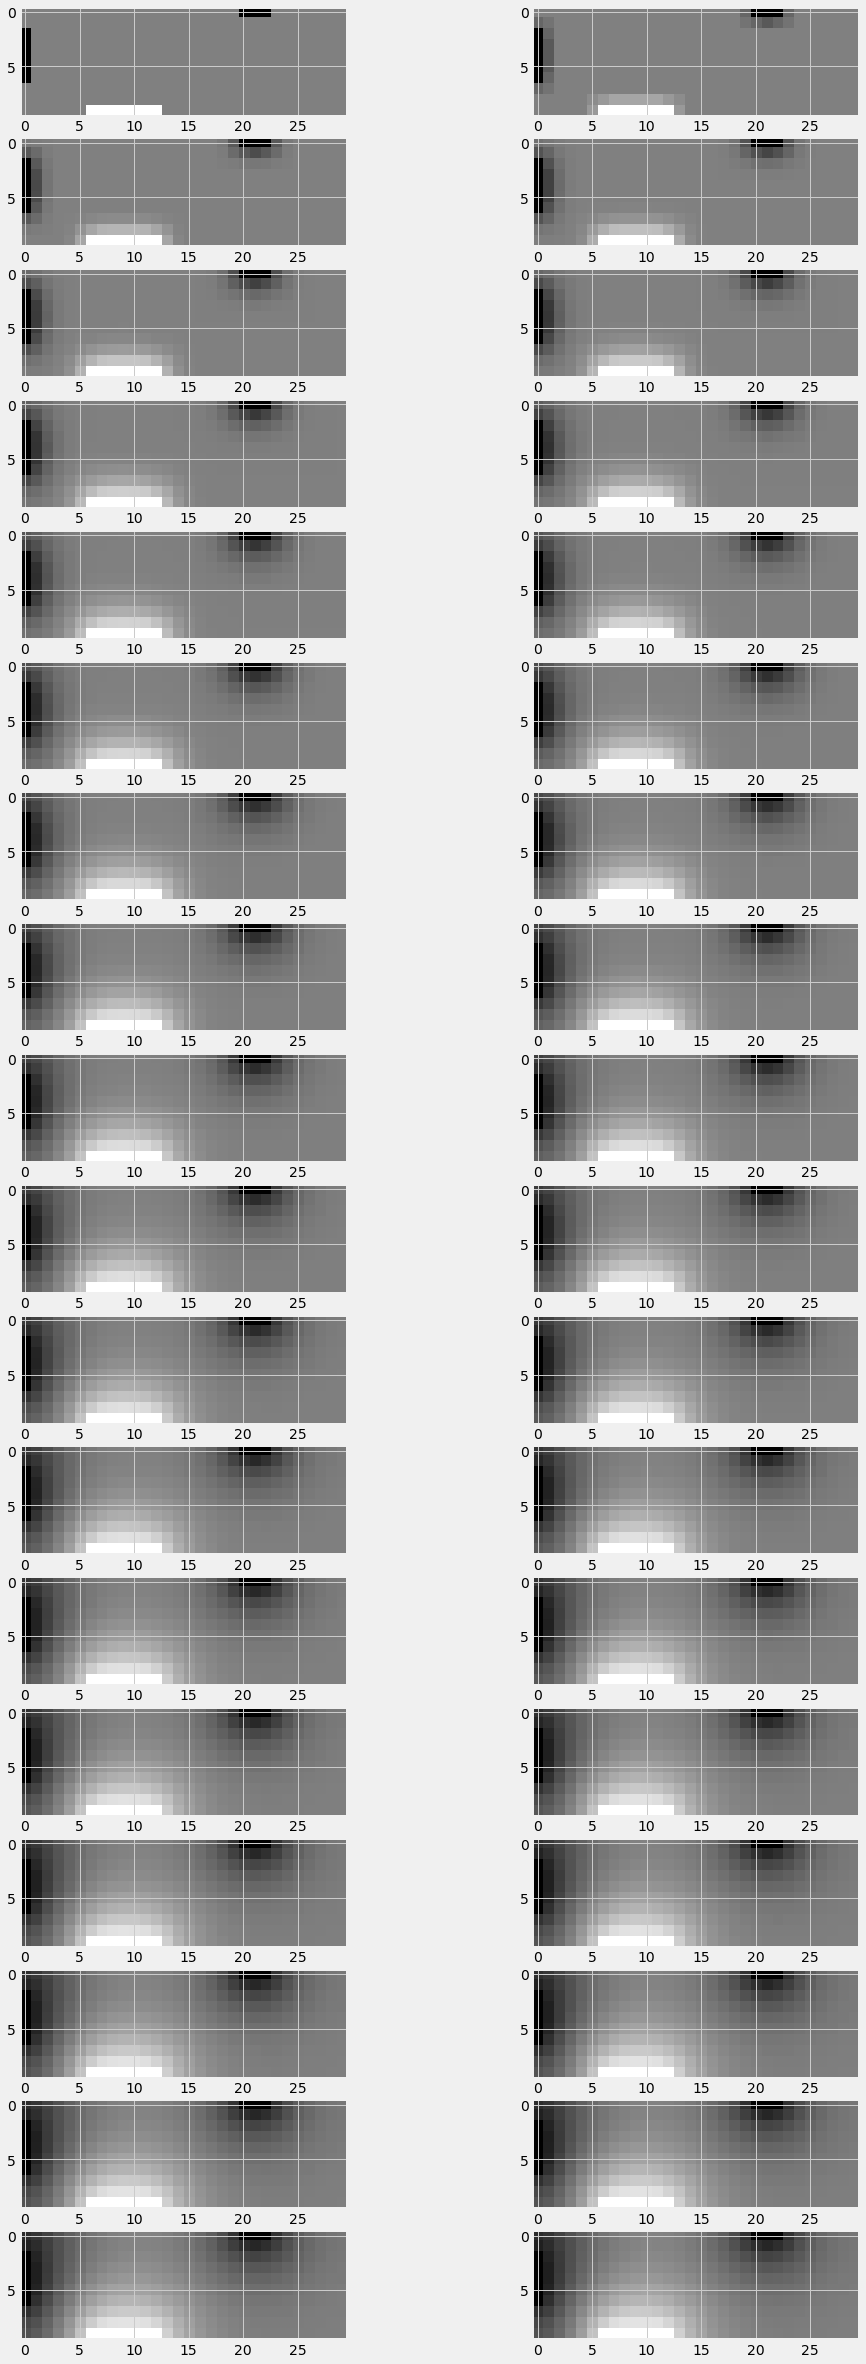

In [31]:
grids=np.array(grids)
grids=1-(grids/50)
animDiffusionGray(grids)

## Project Q1 a

In [149]:
def giveTimeToReachEquilbrm(m,n,diffusionRate,tolerance,time_lim_for_hot_cold): #m, n, diffusionRate,
    bar=initBar(m,n,hotsites,coldsites)
    grids=[]
    grids.append(bar)
    t=0
    while(t==0 or np.max(abs(grids[-1]-grids[-2]))>tolerance):
        barExtended=(reflectingLat(bar)).copy()
        bar=np.zeros((m,n))
        bar=applyDiffusionExtended(bar,barExtended,diffusionRate)
        t+=1
        if(t<=time_lim_for_hot_cold):
            bar=applyHotCold(bar,hotsites,coldsites)
        #print('****************************************')
        grids.append(bar)
        #print(grids[i])
        
    return (t-1)

In [152]:
print("Time required for above case to reach eqilibrium: ",giveTimeToReachEquilbrm(10,30,diffusionRate,0.01,float("inf")))

Time required for above case to reach eqilibrium:  415


In [153]:
print("Time required for above case to reach eqilibrium: ",giveTimeToReachEquilbrm(10,30,diffusionRate,0.001,float("inf")))

Time required for above case to reach eqilibrium:  888


## Q1(b) 

In [154]:
giveTimeToReachEquilbrm(10,30,diffusionRate,0.001,10)

334

In [32]:
grids_b=diffusionSim(m,n,diffusionRate,rows*cols-1,'reflecting',25,0,1,1,1,10)
grids_b
#diffusionSim(m,n,diffusionRate,t,typeOfBndryCond,constVal=25,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1,time_lim_for_hot_cold=float('inf')):

36


[array([[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 50, 50, 50, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25

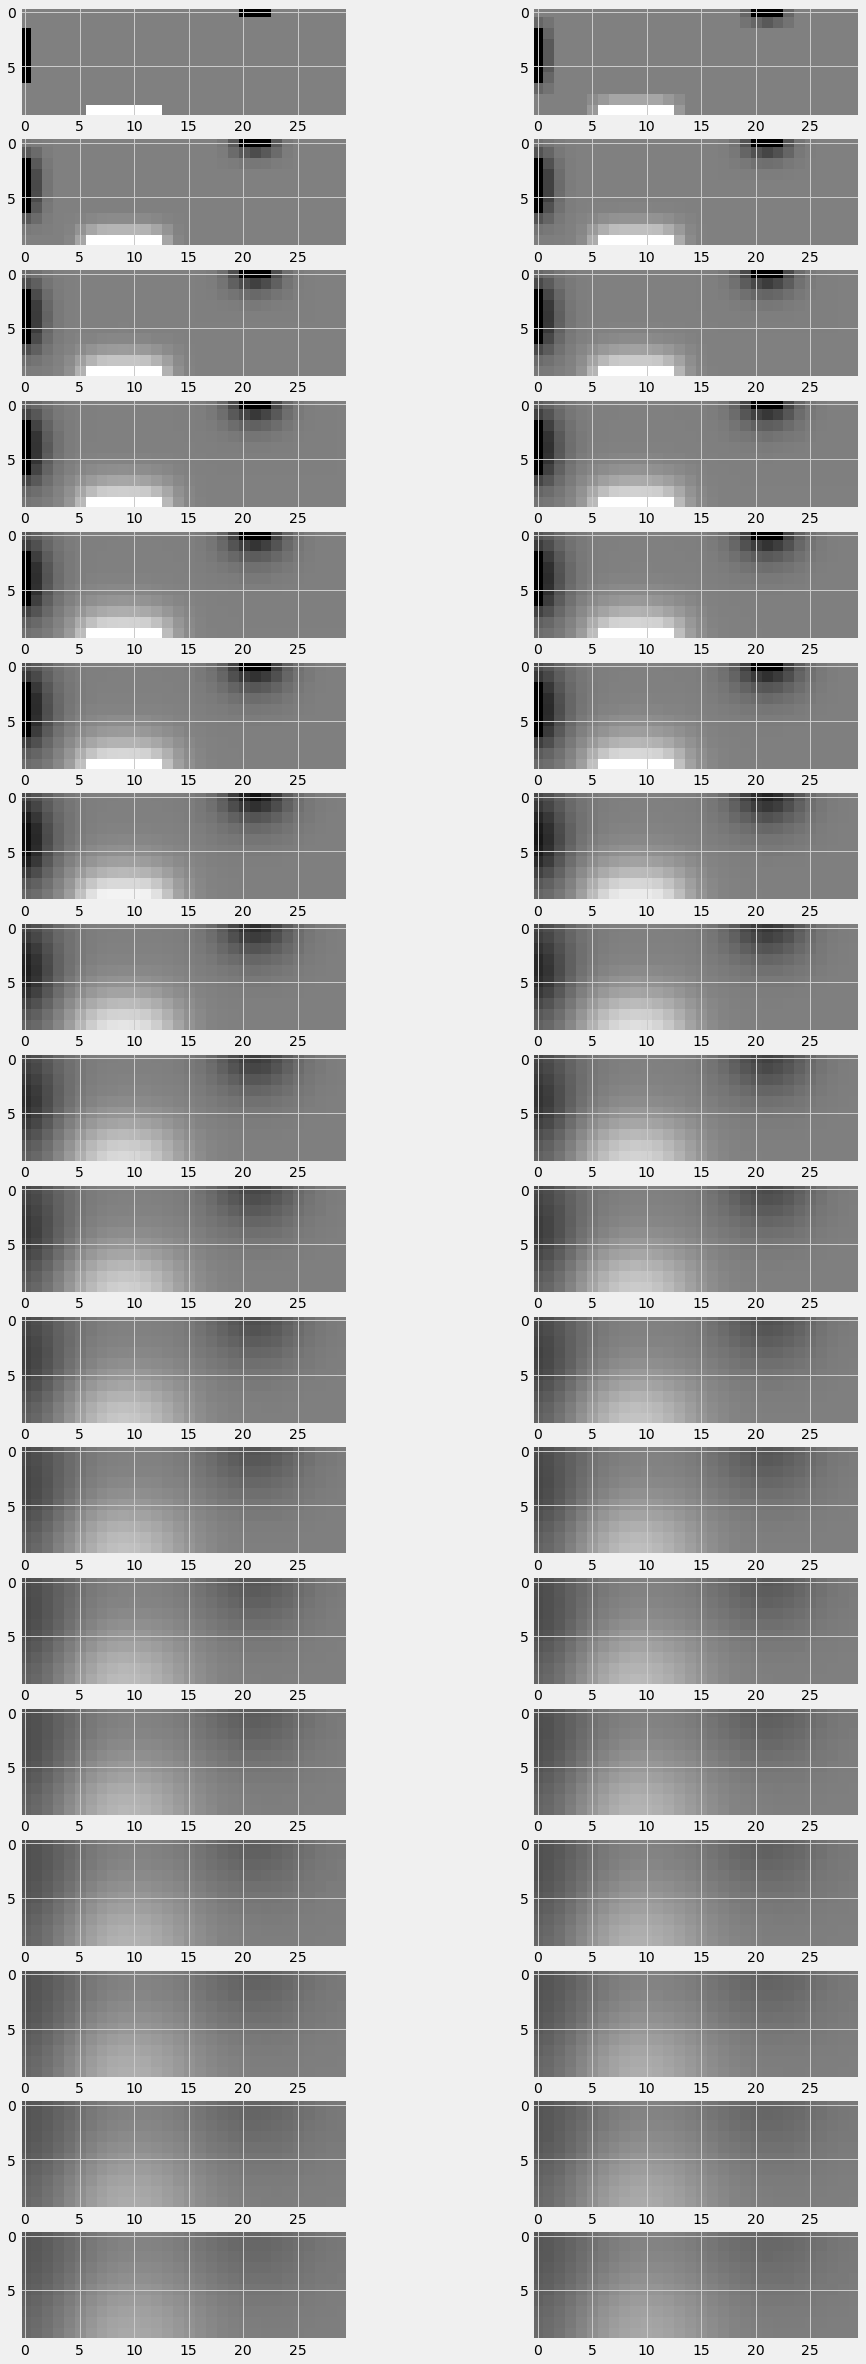

In [33]:
grids_b=np.array(grids_b)
grids_b=1-(grids_b/50)
animDiffusionGray(grids_b)

## Q2 

In [72]:
def absorbingLat(lat,constVal):
    noOfRows,noOfCols=len(lat),len(lat[0])
    
    row1=row2=np.zeros(noOfCols)+constVal
    latNS=np.insert(lat,0,row1,axis=0) # axis=0 means insert along the axis of row
    latNS=np.insert(latNS,m+1,row2,axis=0)
    
    col1=col2=np.zeros(noOfRows+2)+constVal
    extendLat=np.insert(latNS,0,col1,axis=1)
    extendLat=np.insert(extendLat,n+1,col2,axis=1)
    return extendLat

In [21]:
def periodicLat(lat):
    row1=lat[0,:]
    row2=lat[m-1,:]
    latNS=np.insert(lat,0,row2,axis=0)
    latNS=np.insert(latNS,m+1,row1,axis=0)
    
    col1=latNS[:,0]
    col2=latNS[:,n-1]
    extendLat=np.insert(latNS,0,col2,axis=1)
    extendLat=np.insert(extendLat,n+1,col1,axis=1)
    return extendLat

In [76]:
grids2=diffusionSim(10,30,diffusionRate,rows*cols-1,'absorbing',0)
grids2
#diffusionSim(m,n,diffusionRate,t,typeOfBndryCond,constVal=25,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1,time_lim_for_hot_cold=float('inf')):

36


[array([[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 50, 50, 50, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25

## Absorbing with constVal=0 

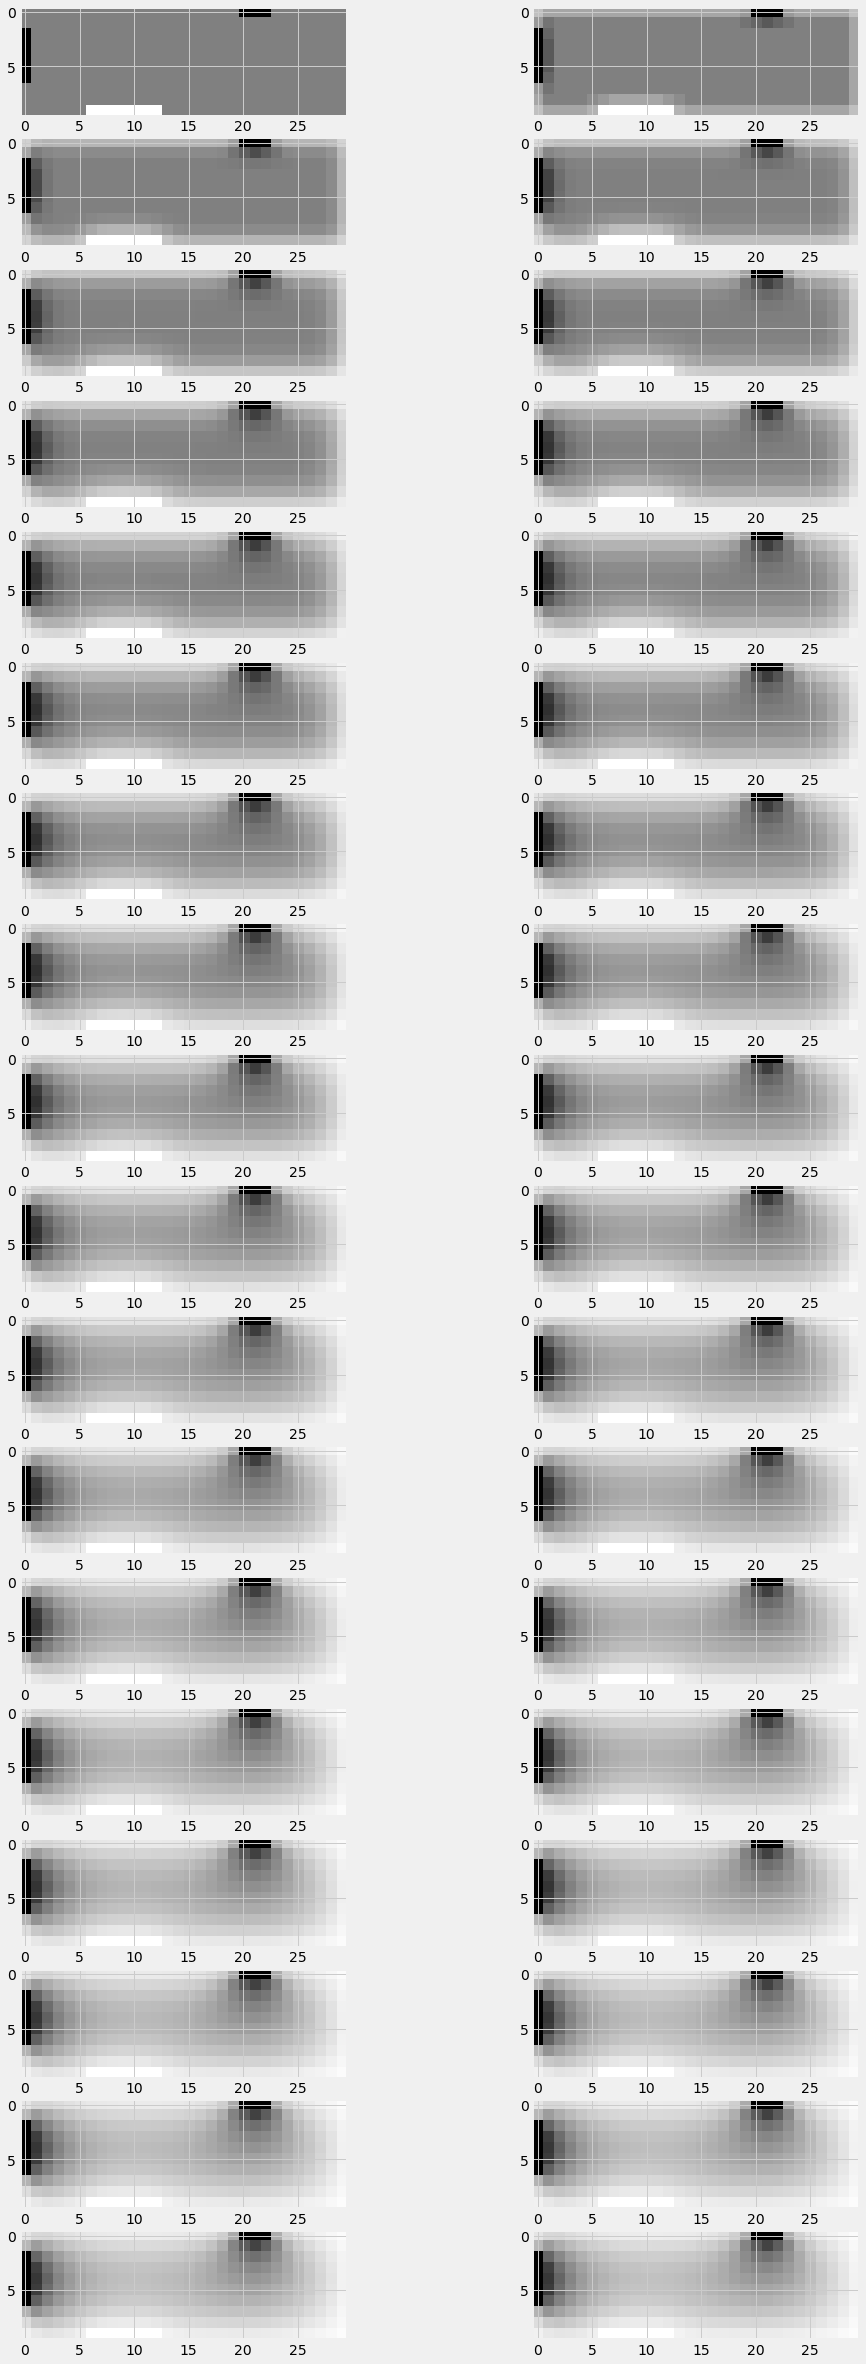

In [77]:
grids2=np.array(grids2)
grids2=1-(grids2/50)
animDiffusionGray(grids2)

In [78]:
grids3=diffusionSim(10,30,diffusionRate,rows*cols-1,'absorbing',25)
grids3

36


[array([[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 50, 50, 50, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25

## Absorbing with constVal=25 

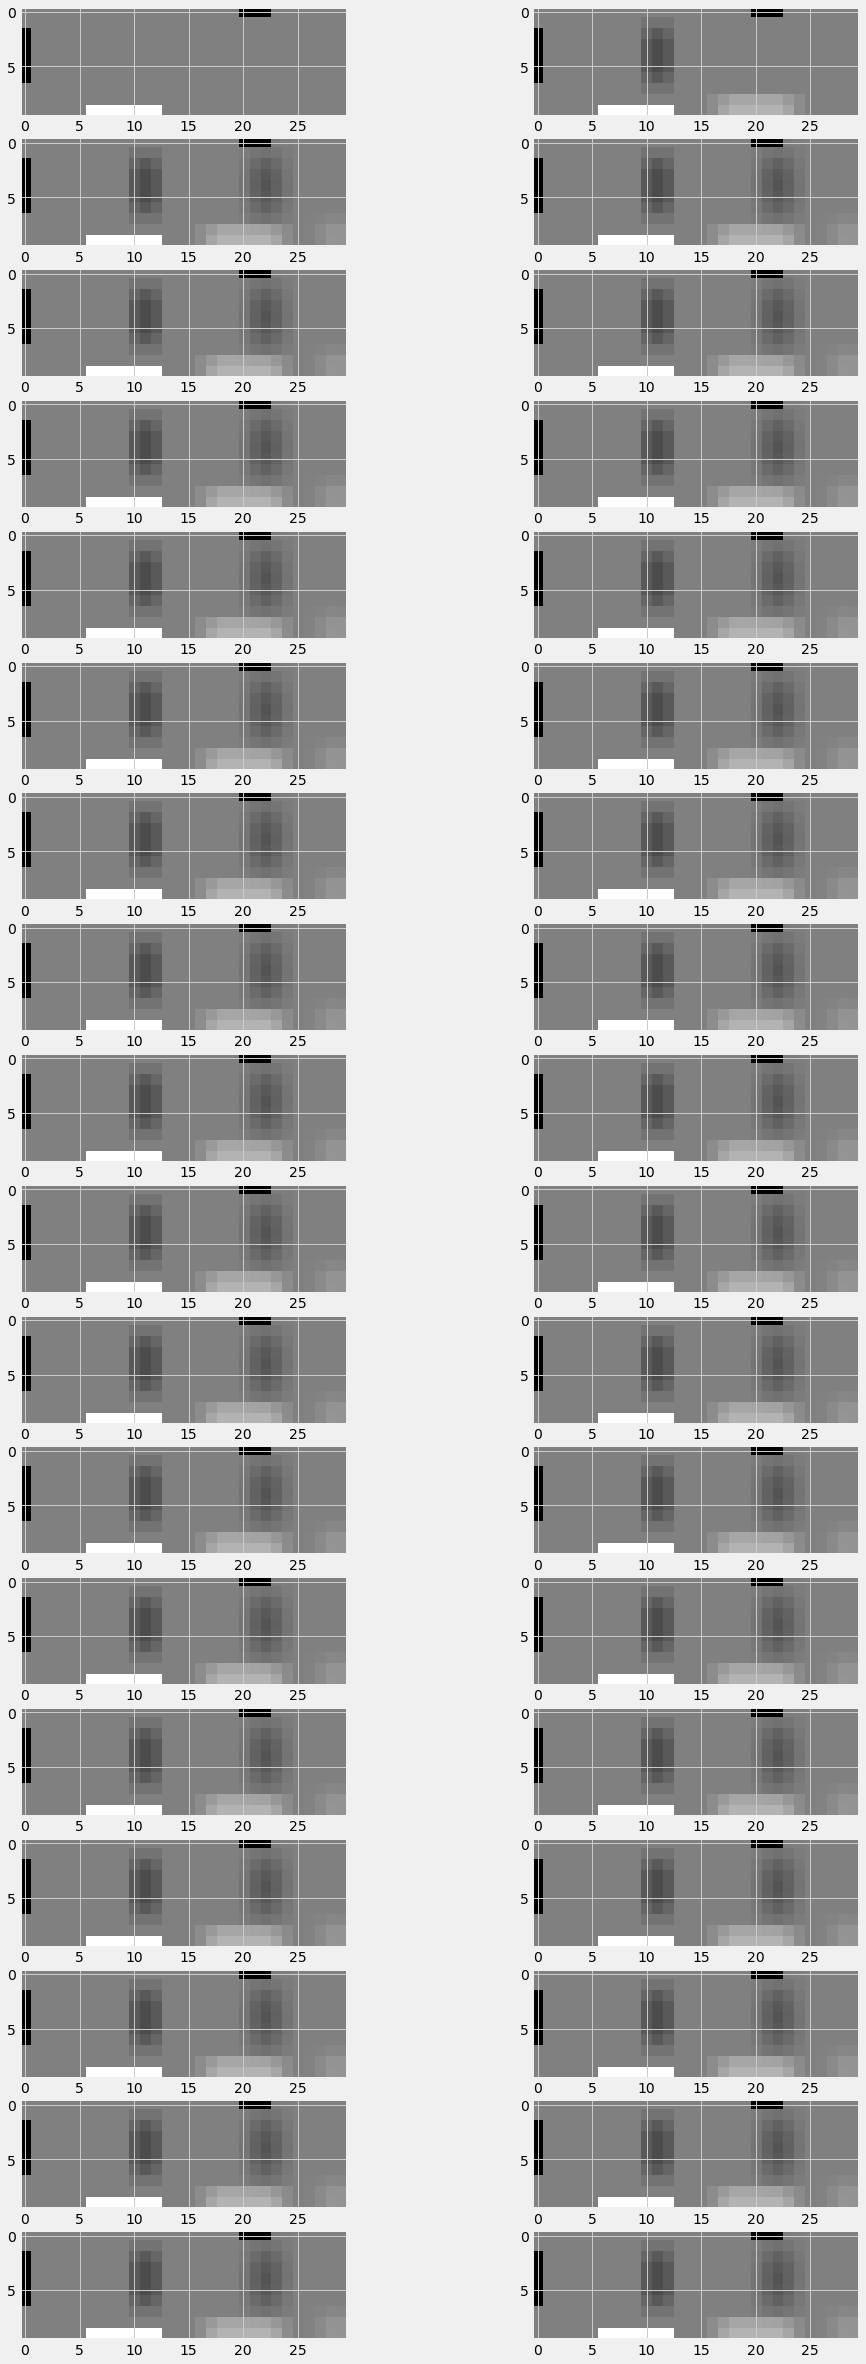

In [37]:
grids3=np.array(grids3)
grids3=1-(grids3/50)
animDiffusionGray(grids3)

In [79]:
grids4=diffusionSim(10,30,diffusionRate,rows*cols-1,'absorbing',50)
# grids4=1-(grids4/50)
grids4=np.array(grids4)
grids4=1-(grids4/50)
print(grids4)

36
[[[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.         0.5        0.5        ... 0.5        0.5        0.5       ]
  ...
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]

 [[0.25       0.35       0.35       ... 0.35       0.35       0.25      ]
  [0.3        0.45       0.5        ... 0.5        0.5        0.35      ]
  [0.         0.4        0.5        ... 0.5        0.5        0.35      ]
  ...
  [0.3        0.45       0.5        ... 0.5        0.5        0.35      ]
  [0.35       0.5        0.5        ... 0.5        0.5        0.35      ]
  [0.25       0.35       0.35       ... 0.35       0.35       0.25      ]]

 [[0.16       0.255      0.285      ... 0.29       0.265      0.17      ]
  [0.205      0.355

# Absorbing with constVal=50 

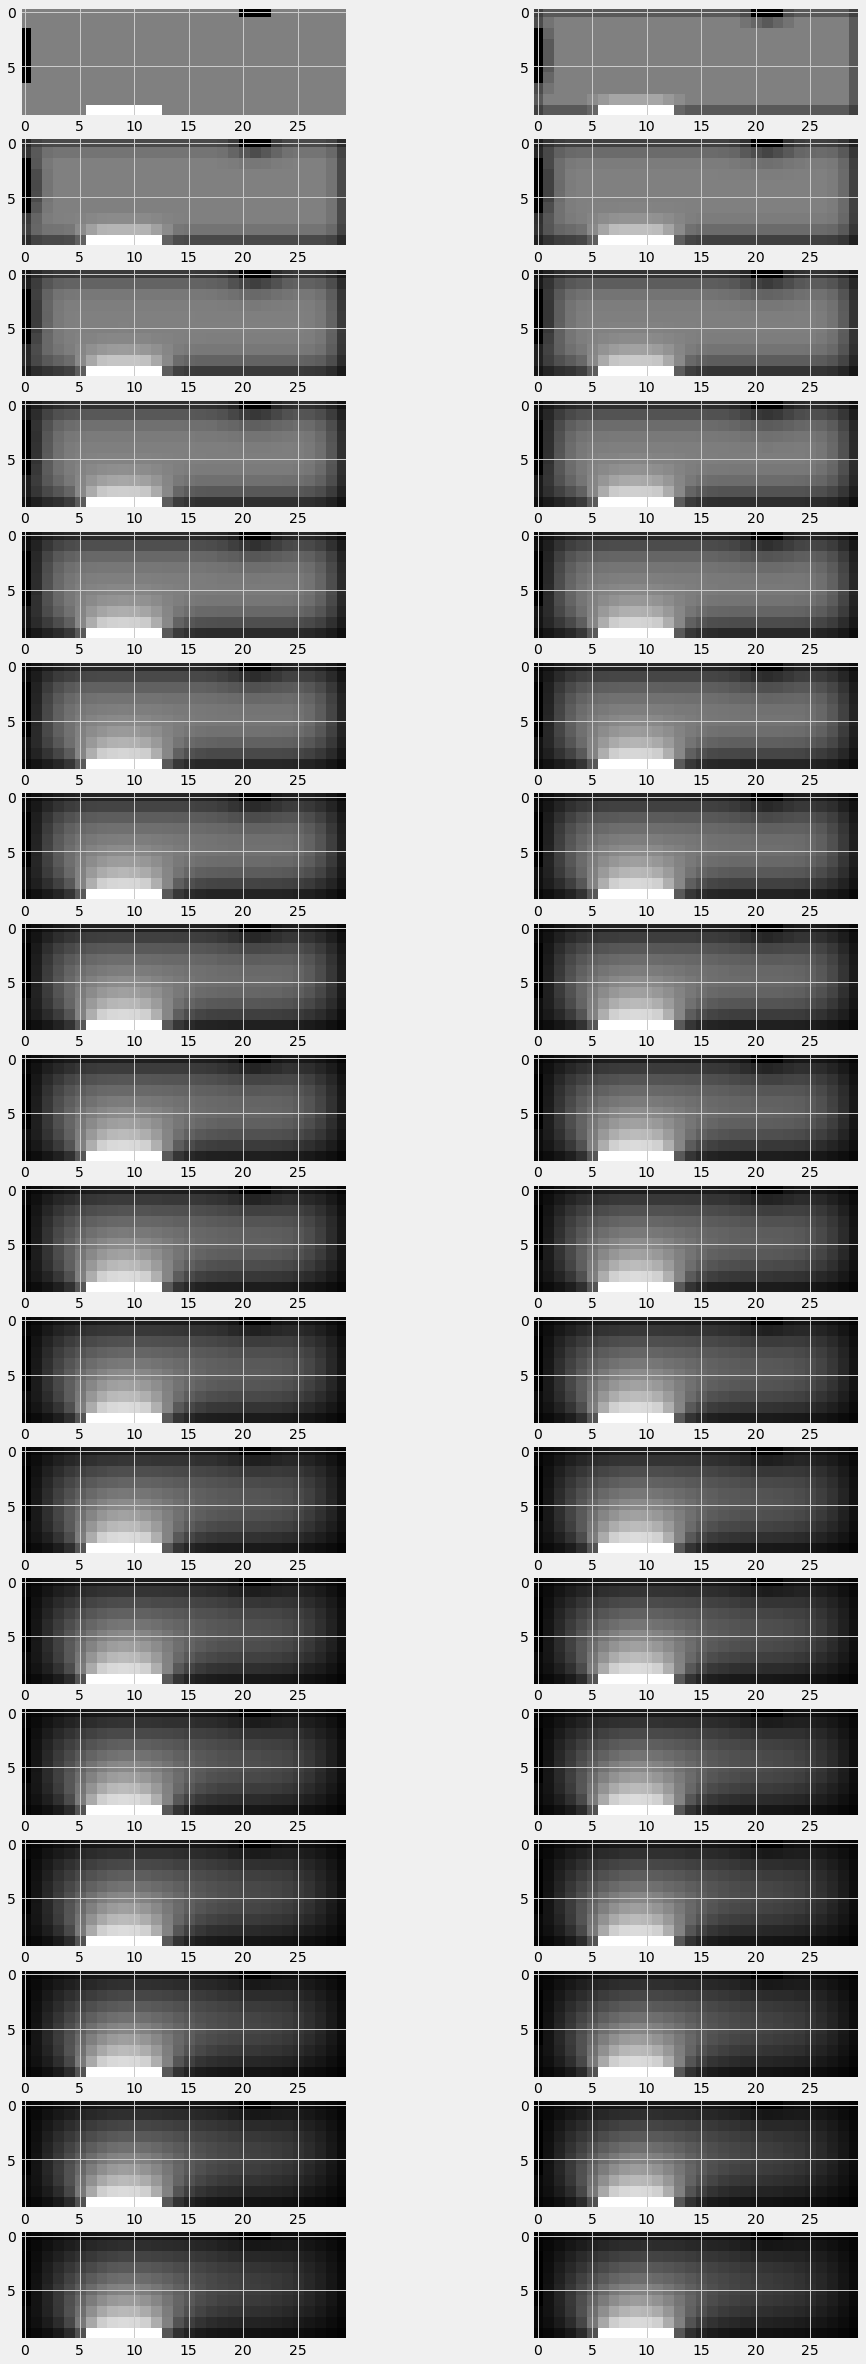

In [80]:
animDiffusionGray(grids4)

In [40]:
grids5=diffusionSim(10,30,diffusionRate,rows*cols-1,'periodic')
#diffusionSim(m,n,diffusionRate,t,typeOfBndryCond,constVal=25,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1,time_lim_for_hot_cold=float('inf')):
# grids4=1-(grids4/50)
grids5=np.array(grids5)
grids5=1-(grids5/50)
print(grids5)

36
[[[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.         0.5        0.5        ... 0.5        0.5        0.5       ]
  ...
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]

 [[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.45       0.45       0.5        ... 0.5        0.5        0.45      ]
  [0.         0.4        0.5        ... 0.5        0.5        0.4       ]
  ...
  [0.45       0.45       0.5        ... 0.5        0.5        0.45      ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
  [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]]

 [[0.485      0.49       0.495      ... 0.5        0.495      0.49      ]
  [0.41       0.425

## Periodic  

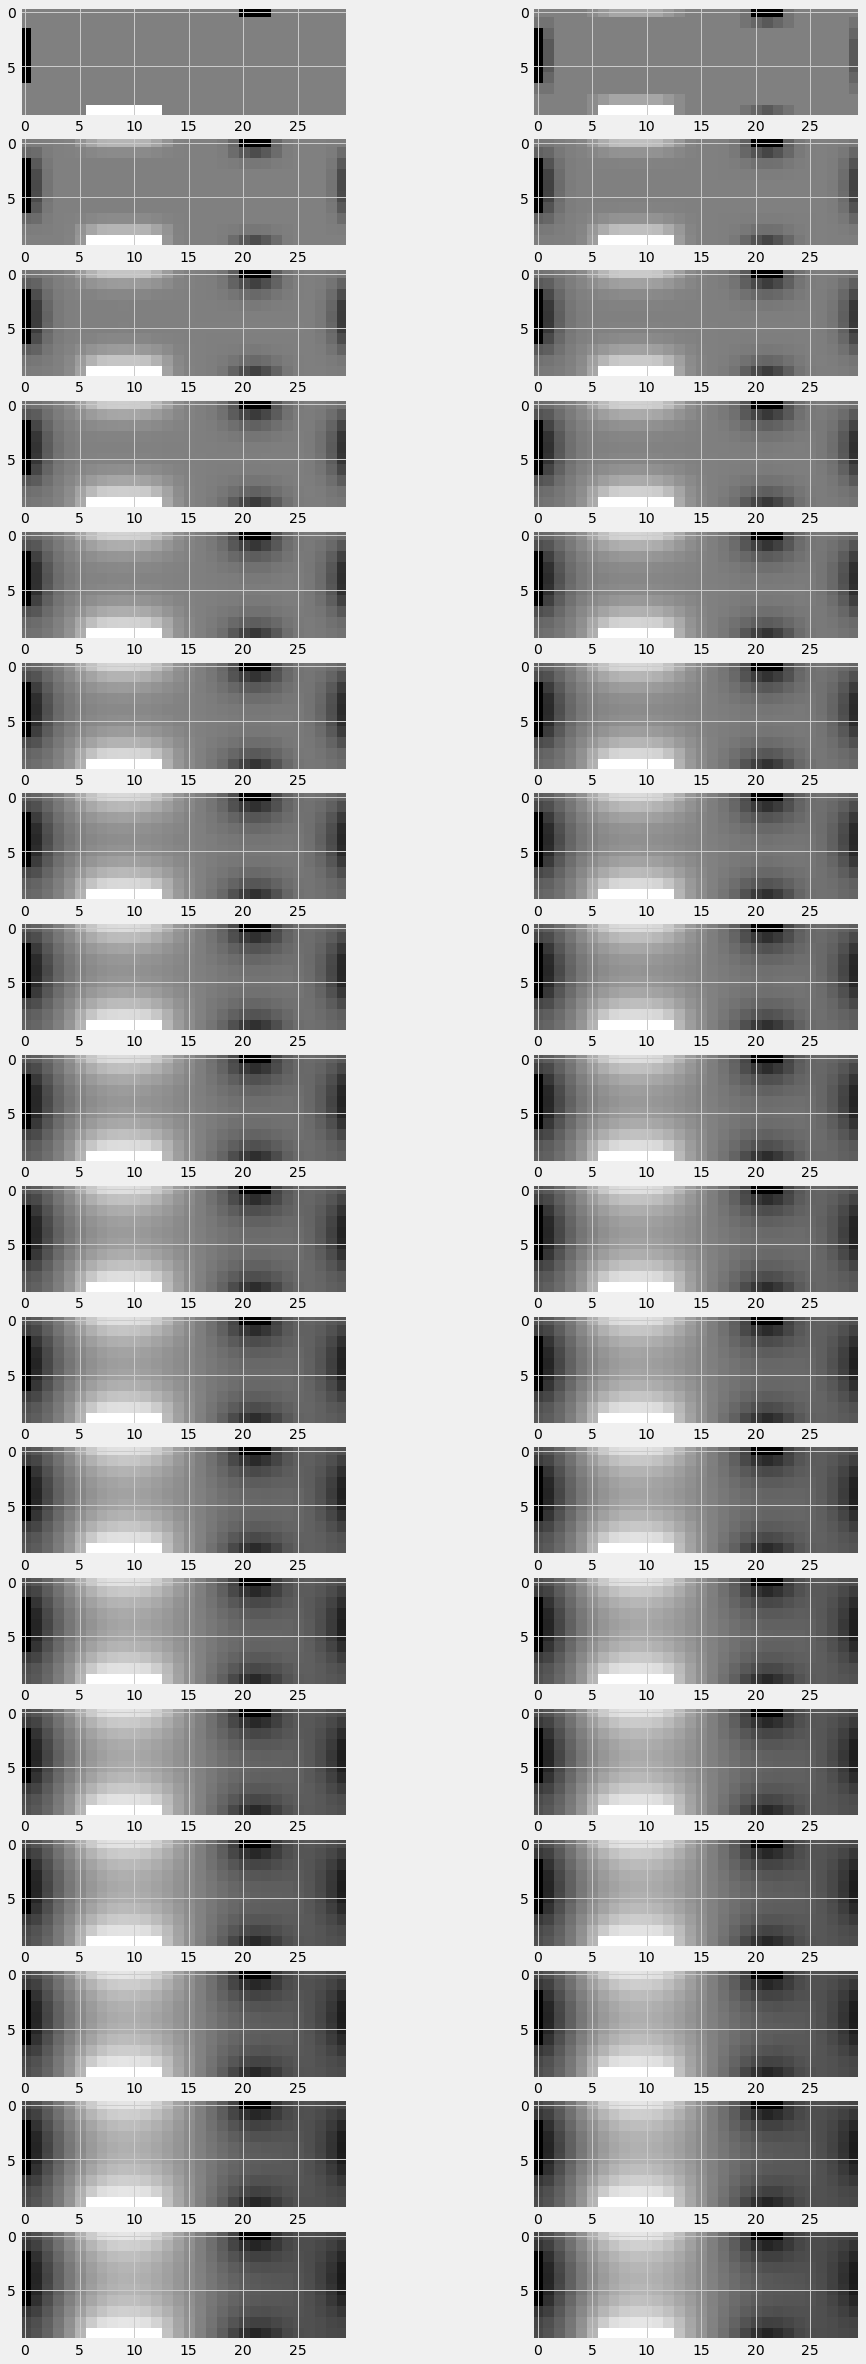

In [41]:
animDiffusionGray(grids5)

## Q3 Weighted diffusion 

In [42]:
## only we have to specify values of optional params in the diffusion func call
grids6=diffusionSim(m,n,-1,rows*cols-1,'reflecting',25,1,0.25,0.125,0.0625)
grids6
#diffusionSim(m,n,diffusionRate,t,typeOfBndryCond,constVal=25,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1,time_lim_for_hot_cold=float('inf')):

36


[array([[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 50, 50, 50, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
        [25, 25, 25, 25, 25

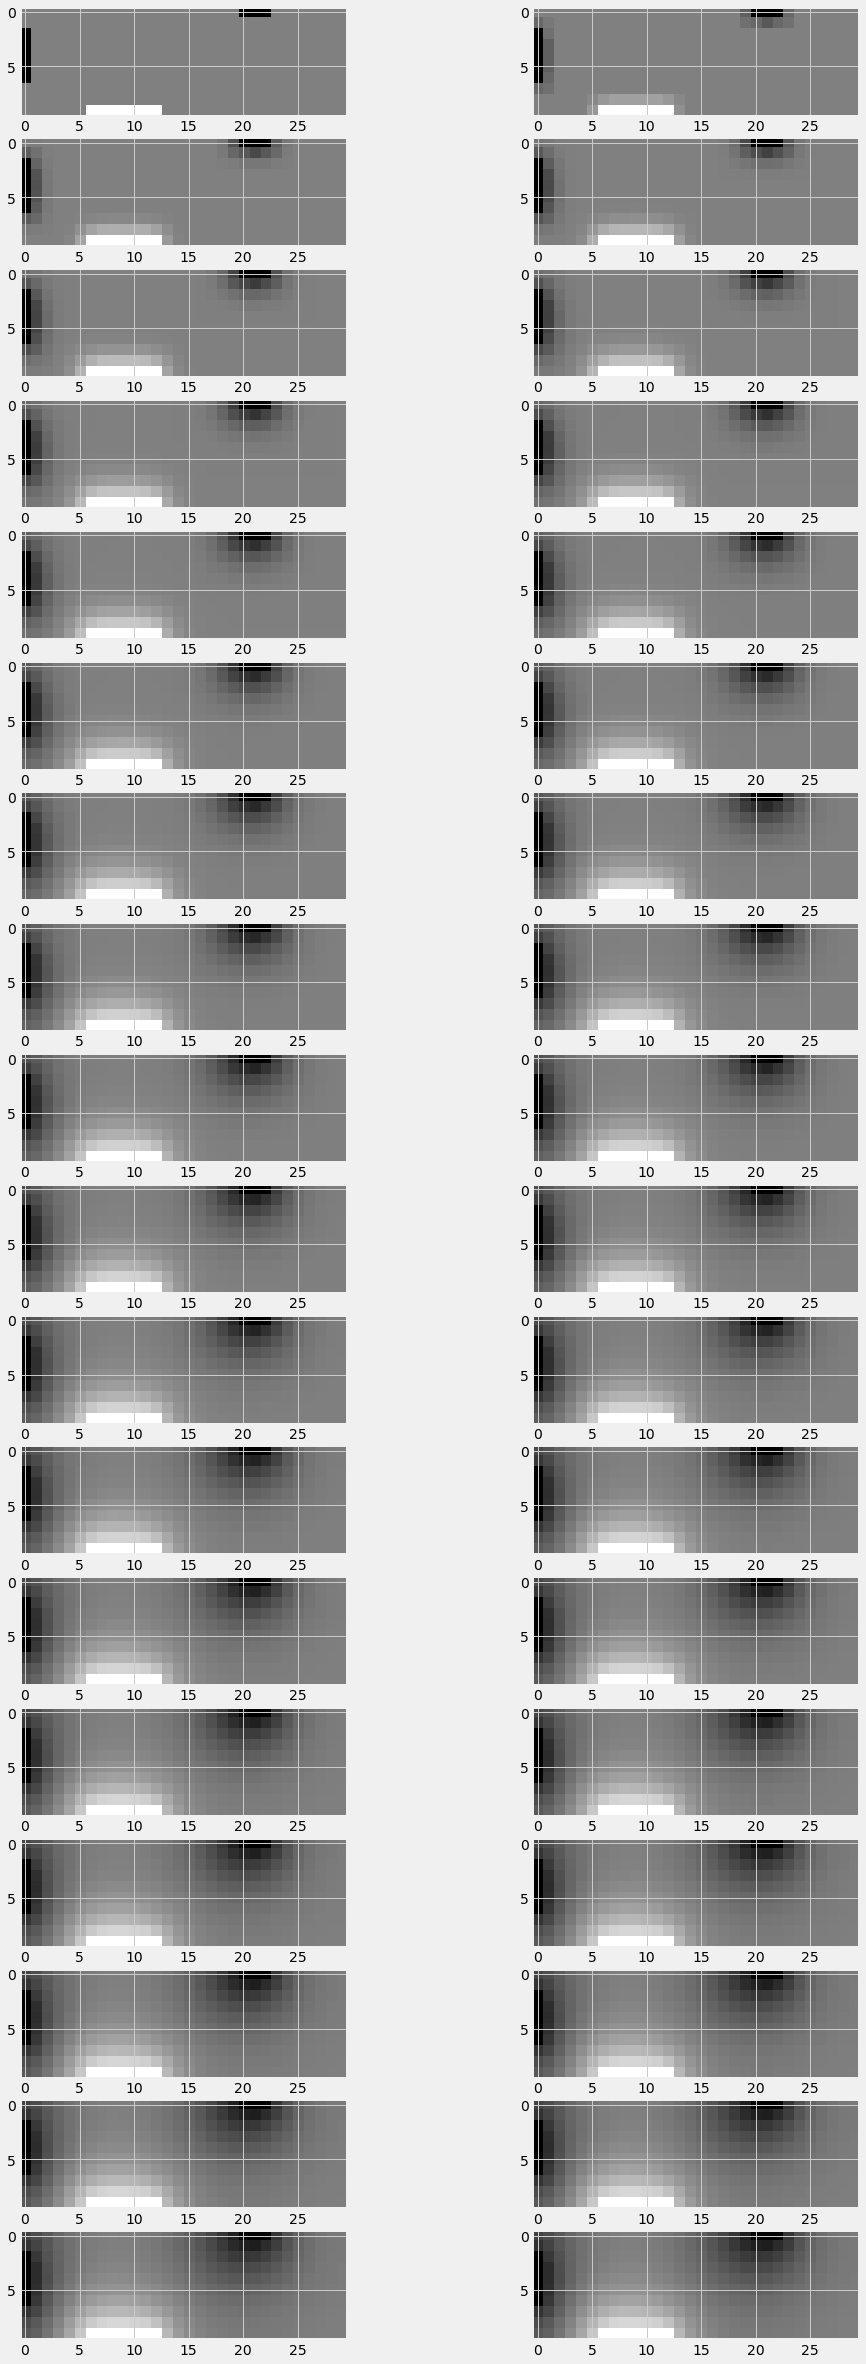

In [43]:
grids6=np.array(grids6)
grids6=1-(grids6/50)
animDiffusionGray(grids6)

In [208]:
grids

array([[[0.5       , 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.5       , 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.        , 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        ...,
        [0.5       , 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.5       , 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.5       , 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ]],

       [[0.5       , 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.4       , 0.45      , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.        , 0.4       , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        ...,
        [0.4       , 0.45      , 0.5       , ..., 0.5       ,
         0.5       , 0.5       ],
        [0.5

## Project Q4 

In [118]:
AMBIENT=100 # changing the ambient temp of the bar
hotsites=[]
coldsites=[]
rows=100

In [119]:
grids7=diffusionSim(10,30,diffusionRate,rows*cols-1,'absorbing',25)
temp_at_corner=np.zeros(len(grids7))+AMBIENT
temp_at_middle=np.zeros(len(grids7))+AMBIENT
print(len(grids7),len(temp_at_corner),len(temp_at_middle))
#diffusionSim(m,n,diffusionRate,t,typeOfBndryCond,constVal=25,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1,time_lim_for_hot_cold=float('inf')):

200
200 200 200


In [86]:
grids7

[array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 10

## Q4 a 

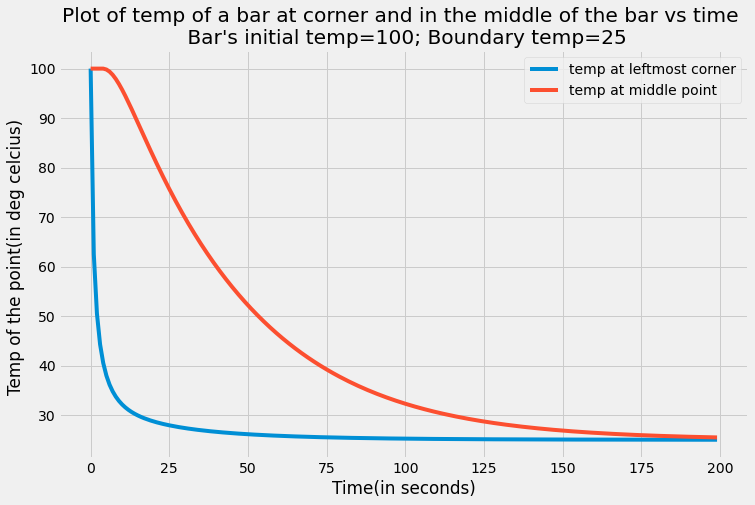

In [120]:
ind=0
for grd in grids7:
   temp_at_corner[ind]=grd[0][0]
   temp_at_middle[ind]=grd[5][15]
   ind+=1
time_steps=np.arange(len(grids7))
str="Plot of temp of a bar at corner and in the middle of the bar vs time \n Bar's initial temp={}; Boundary temp={}"
str=str.format(AMBIENT,25) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Temp of the point(in deg celcius) ')
plt.plot(time_steps,temp_at_corner,label='temp at leftmost corner')
plt.plot(time_steps,temp_at_middle,label='temp at middle point')
plt.legend()

In [107]:
temp_at_corner

array([-50.        , -12.5       ,  -0.5       ,   5.725     ,
         9.49      ,  12.0235    ,  13.8445    ,  15.2169775 ,
        16.288552  ,  17.1484561 ,  17.85392283,  18.44344183,
        18.9438825 ,  19.37456491,  19.7497129 ,  20.08000193,
        20.3735745 ,  20.63672807,  20.87439362,  21.09047576,
        21.28809887,  21.46978782,  21.63760238,  21.79323822,
        21.9381036 ,  22.07337803,  22.20005758,  22.31899008,
        22.43090263,  22.53642335,  22.63609862,  22.73040678,
        22.81976921,  22.90455925,  22.98510947,  23.06171759,
        23.13465143,  23.20415287,  23.27044133,  23.33371652,
        23.39416088,  23.45194157,  23.5072122 ,  23.56011431,
        23.61077866,  23.6593263 ,  23.70586954,  23.75051281,
        23.79335336,  23.83448192,  23.87398329,  23.91193683,
        23.94841691,  23.98349332,  24.01723165,  24.04969361,
        24.0809373 ,  24.1110175 ,  24.13998592,  24.1678914 ,
        24.19478012,  24.22069577,  24.24567976,  24.26

In [108]:
temp_at_middle

array([-50.        , -50.        , -50.        , -50.        ,
       -50.        , -49.81775   , -49.398575  , -48.7479425 ,
       -47.896835  , -46.8828689 , -45.74215704, -44.50628716,
       -43.20163877, -41.84967656, -40.46758951, -39.06899385,
       -37.664585  , -36.2627    , -34.86978542, -33.49077945,
       -32.12942067, -30.78849624, -29.47004079, -28.17549562,
       -26.90583582, -25.66167191, -24.44333076, -23.25092011,
       -22.08437976, -20.94352227, -19.82806498, -18.73765529,
       -17.6718905 , -16.63033324, -15.61252341, -14.61798741,
       -13.6462451 , -12.69681512, -11.76921872, -10.86298268,
        -9.97764124,  -9.11273748,  -8.2678242 ,  -7.44246444,
        -6.63623161,  -5.84870958,  -5.07949254,  -4.32818468,
        -3.59439997,  -2.87776177,  -2.17790245,  -1.49446301,
        -0.82709274,  -0.17544878,   0.46080414,   1.08199412,
         1.68844232,   2.2804633 ,   2.85836526,   3.4224503 ,
         3.9730146 ,   4.51034867,   5.03473751,   5.54

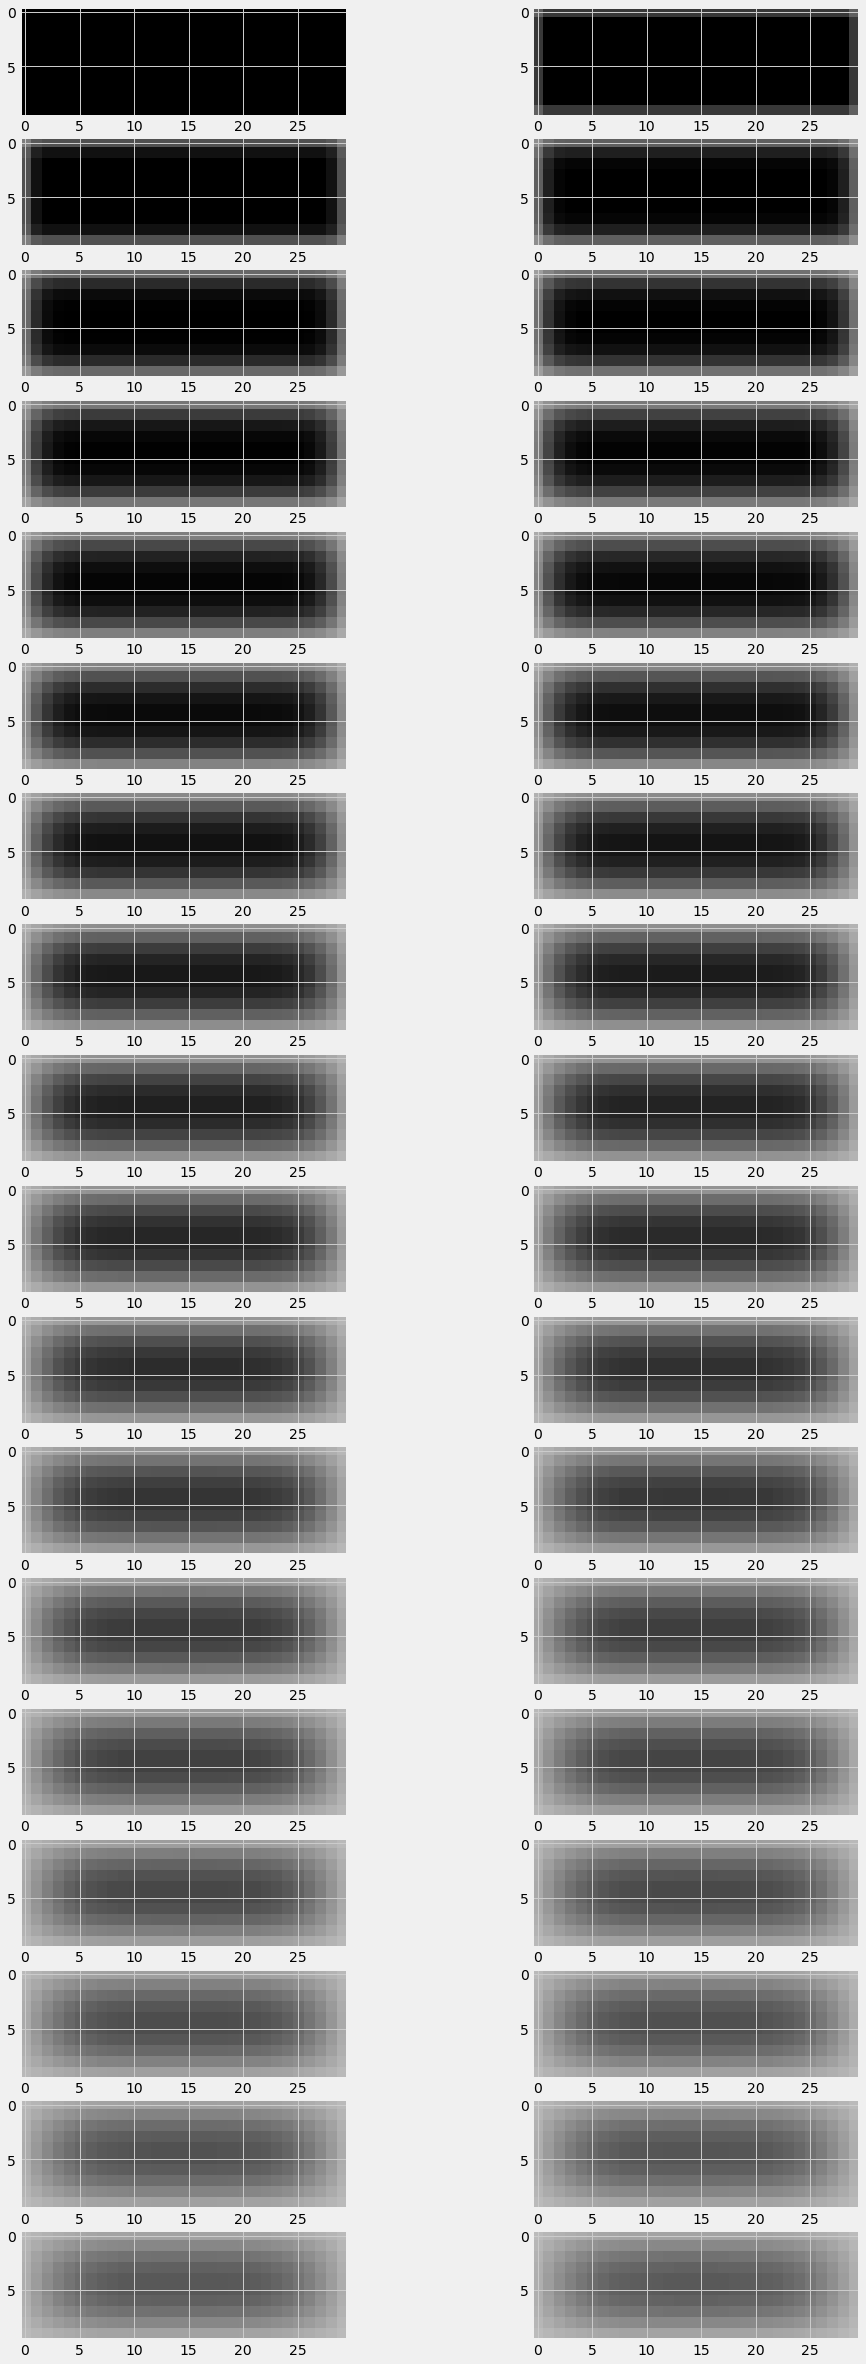

In [90]:
grids7=np.array(grids7)
grids7=1-(grids7/100) # in scale btw 100
animDiffusionGray(grids7)

## Q4 b 

In [97]:
AMBIENT=-50 # changing the ambient temp of the bar
hotsites=[]
coldsites=[]
rows=100

In [113]:
grids8=diffusionSim(10,30,diffusionRate,rows*cols-1,'absorbing',25)
temp_at_corner=np.zeros(len(grids8))+AMBIENT
temp_at_middle=np.zeros(len(grids8))+AMBIENT
print(len(grids8),len(temp_at_corner),len(temp_at_middle))
#diffusionSim(m,n,diffusionRate,t,typeOfBndryCond,constVal=25,weighted=0,own_weight=1,strgt_wgt=1,crnr_wgt=1,time_lim_for_hot_cold=float('inf')):

200
200 200 200


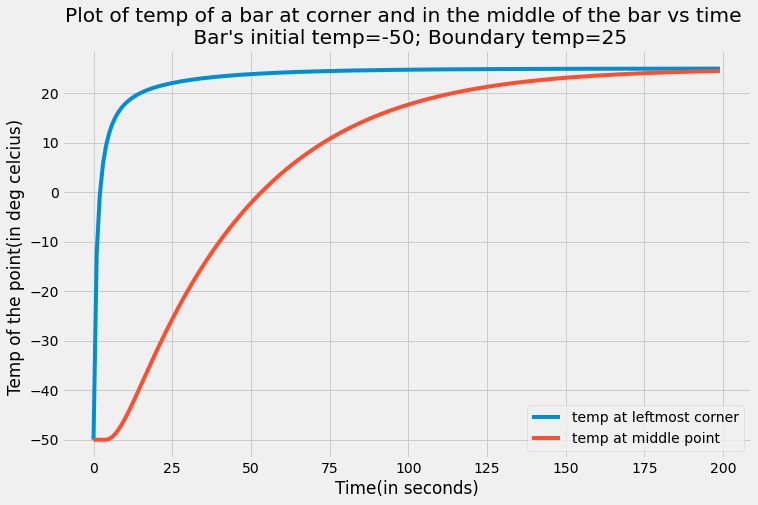

In [115]:
ind=0
for grd in grids8:
   temp_at_corner[ind]=grd[0][0]
   temp_at_middle[ind]=grd[5][15]
   ind+=1
time_steps=np.arange(len(grids8))
str="Plot of temp of a bar at corner and in the middle of the bar vs time \n Bar's initial temp={}; Boundary temp={}"
str=str.format(AMBIENT,25) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Temp of the point(in deg celcius) ')
plt.plot(time_steps,temp_at_corner,label='temp at leftmost corner')
plt.plot(time_steps,temp_at_middle,label='temp at middle point')
plt.legend()

In [111]:
if(len(grids8)==len(temp_at_corner)):
    print('equal')
else:
    print('unequal')

unequal


In [114]:
a=len(grids8)
b=len(temp_at_corner)
c=len(temp_at_middle)
print(a,b,c)

200 200 200
